In [2]:
import os
import tweepy as tw
import pandas as pd
import spacy
import re
import collections
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [3]:
nlp = spacy.load('es_core_news_md')

In [247]:
stop_words = stopwords.words('spanish')
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [5]:
consumer_key = "xuSrX6LK9gfsWnJ1CTQblfL83"
consumer_secret = "lIyGqVBJygUHHQ4ZoHyAc8INULSr1B4WnuCajei13QINe7U3SH"
access_token = "549909021-ksoN2E4V4yAlhAPa5EUuItuiQhSXyIKFEvCHLqMv"
access_token_secret ="JplD62xq9UPnlQ0NFekGINJZHO1nEpfmw8Myiyl6PyaXS"


In [6]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [7]:
# Post a tweet from Python
api.update_status("El liderazgo se nota cuando se ejerce, no por el simple hecho de 'ser' un líder. #LeadershipTips")
# Your tweet has been posted!

TweepError: Read-only application cannot POST.

In [51]:
# Define the search term and the date_since date as variables
search_words = "#colombia"
date_since = "2021-01-01"
fromivanduque = "from:ivanduque"
toivanduque = "@ivanduque -filter:retweets"

In [52]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=toivanduque,
              lang="es",
              since=date_since).items(2000)
tweets

TypeError: 'ItemIterator' object is not subscriptable

In [32]:
# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

In [53]:
# Collect a list of tweets
twitter_texts = [tweet.text for tweet in tweets]

In [54]:
twitter_texts

['@infopresidencia @IvanDuque O sea que de a millón por mes la vacunación termina dentro de 50 meses?\nNooo!! Pues que chimba de noticia.!!',
 '@VLADDO @CamiloRomero @IvanDuque @DaniSie Y ni bolas le paró.',
 '#NoLesDaPena a @IvanDuque  no le da pena, si le diera pena ya habría renunciado, el peor gobierno, el país en quieb… https://t.co/LyWHg2vnYW',
 '@IvanDuque No estudian no tengo un trabajo ni mi hijo por eso veo tan injusto que la unidad de víctimas me haya ret… https://t.co/0xBuwQkOmj',
 '@RevistaSemana @IvanDuque las finanzas de quien?, no creo realmente que ud este del lado we los trabajadores. Porqu… https://t.co/EQAZAQQKF0',
 '#ATENCION #URGENTE EL GOBIERNO ECOCIDA  DE \n@IvanDuque @Diego_Molano INCUMPLE ACUERDOS INTERNACIONALES EN USO GLIFO… https://t.co/oL7z5kdBg3',
 '#GlifosatoEs otra puñalada más al proceso de paz, otro incumplimiento a una obligación internacional del Estado en… https://t.co/N8ZtfCTCla',
 '@IvanDuque @AmChamCol Los vulnerables  del país le agradecen su r

In [57]:
len(twitter_texts)

2000

In [213]:
import string
alphabet_string = string.ascii_lowercase
#Create a string of all lowercase letters

alphabet_list = list(alphabet_string)
#Create a list of all lowercase letters

print(alphabet_list)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [214]:
#Create lists of two words
two_word_list = []
for a in alphabet_list:
    for i in range(len(alphabet_list)):
        two_word_list.append(a+alphabet_list[i])
print(two_word_list)

['aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av', 'aw', 'ax', 'ay', 'az', 'ba', 'bb', 'bc', 'bd', 'be', 'bf', 'bg', 'bh', 'bi', 'bj', 'bk', 'bl', 'bm', 'bn', 'bo', 'bp', 'bq', 'br', 'bs', 'bt', 'bu', 'bv', 'bw', 'bx', 'by', 'bz', 'ca', 'cb', 'cc', 'cd', 'ce', 'cf', 'cg', 'ch', 'ci', 'cj', 'ck', 'cl', 'cm', 'cn', 'co', 'cp', 'cq', 'cr', 'cs', 'ct', 'cu', 'cv', 'cw', 'cx', 'cy', 'cz', 'da', 'db', 'dc', 'dd', 'de', 'df', 'dg', 'dh', 'di', 'dj', 'dk', 'dl', 'dm', 'dn', 'do', 'dp', 'dq', 'dr', 'ds', 'dt', 'du', 'dv', 'dw', 'dx', 'dy', 'dz', 'ea', 'eb', 'ec', 'ed', 'ee', 'ef', 'eg', 'eh', 'ei', 'ej', 'ek', 'el', 'em', 'en', 'eo', 'ep', 'eq', 'er', 'es', 'et', 'eu', 'ev', 'ew', 'ex', 'ey', 'ez', 'fa', 'fb', 'fc', 'fd', 'fe', 'ff', 'fg', 'fh', 'fi', 'fj', 'fk', 'fl', 'fm', 'fn', 'fo', 'fp', 'fq', 'fr', 'fs', 'ft', 'fu', 'fv', 'fw', 'fx', 'fy', 'fz', 'ga', 'gb', 'gc', 'gd', 'ge', 'gf', 'gg', 'gh', 'gi', 'gj', 'gk

In [116]:
pd_tweets = pd.DataFrame(twitter_texts,columns ={ 'tweets'})

In [117]:
pd_tweets.head()

,tweets
0,@infopresidencia @IvanDuque O sea que de a mil...
1,@VLADDO @CamiloRomero @IvanDuque @DaniSie Y ni...
2,"#NoLesDaPena a @IvanDuque no le da pena, si l..."
3,@IvanDuque No estudian no tengo un trabajo ni ...
4,@RevistaSemana @IvanDuque las finanzas de quie...


In [118]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [119]:
def remove_hash_ad_emojis(text):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","", text).split())

In [120]:
pd_tweets['tweets']=pd_tweets['tweets'].apply(lambda x: remove_hash_ad_emojis(x))

In [121]:
pd_tweets.head()

,tweets
0,O sea que de a milln por mes la vacunacin term...
1,Y ni bolas le par
2,NoLesDaPena a no le da pena si le diera pena y...
3,No estudian no tengo un trabajo ni mi hijo por...
4,las finanzas de quien no creo realmente que ud...


In [129]:
pd_tweets.head()

,tweets
0,O sea que de a milln por mes la vacunacin term...
1,Y ni bolas le par
2,NoLesDaPena a no le da pena si le diera pena y...
3,No estudian no tengo un trabajo ni mi hijo por...
4,las finanzas de quien no creo realmente que ud...


In [130]:
pd_tweets['tweets']

0       O sea que de a milln por mes la vacunacin term...
1                                       Y ni bolas le par
2       NoLesDaPena a no le da pena si le diera pena y...
3       No estudian no tengo un trabajo ni mi hijo por...
4       las finanzas de quien no creo realmente que ud...
5       ATENCION URGENTE EL GOBIERNO ECOCIDA DE Molano...
6       GlifosatoEs otra pualada ms al proceso de paz ...
7       Los vulnerables del pas le agradecen su reform...
8       deleon92 Te corrijo el hashtag NoAlGlifosatoEn...
9                                                        
10          LA PRIMER VACUNA MEXICANA ANTI COVID19 PATRIA
11         Y porque ustedes no dejan trabajar a p3rrohpt4
12       usted definitivamente es peor peste que el covid
13      fue el Ministro de defensa de Alvaro Uribe Vel...
14      En la reforma pasada dijo en todos los medios ...
15      Jummmmmm En gobierno de uribe asesinaron mucha...
16                                                       
17      Y le d

In [241]:
two_word_list[0]

'aa'

In [248]:
newstopwords = ['ivanduque','x','q','si','ser','d','as','pa','ud','usted','señor','seor']
for i in range(len(two_word_list)):
    newstopwords.append(two_word_list[i])
for element in newstopwords:
    stop_words.append(element)
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [123]:
#PREPROCESSING

In [125]:
from sklearn.feature_extraction.text import CountVectorizer

In [249]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)

In [250]:
stopwords

<WordListCorpusReader in '/Users/mac/nltk_data/corpora/stopwords'>

In [251]:
dtm = cv.fit_transform(pd_tweets['tweets'])

In [252]:
dtm

<2000x1496 sparse matrix of type '<class 'numpy.int64'>'
	with 8064 stored elements in Compressed Sparse Row format>

In [253]:
#LDA

In [254]:
from sklearn.decomposition import LatentDirichletAllocation

In [401]:
LDA = LatentDirichletAllocation(n_components=25,random_state=42)

In [402]:
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=25, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [403]:
#Show WORDS 

In [404]:
len(cv.get_feature_names())

1496

In [405]:
import random

In [406]:
for i in range(10):
    random_word_id = random.randint(0,len(cv.get_feature_names()))
    print(cv.get_feature_names()[random_word_id])

santos
medidas
puro
propsito
vea
2017
impuestos
cumpli
glifo
miles


In [407]:
#Showing Words Per TOPIC

In [408]:
len(LDA.components_)

25

In [409]:
len(LDA.components_[0])

1496

In [410]:
single_topic = LDA.components_[0]

In [411]:
single_topic

array([1.04, 1.04, 1.04, ..., 0.04, 0.04, 0.04])

In [412]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([ 747,  959,  958, ...,  872,  245, 1094])

In [413]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([ 829,  814,  193, 1251,  507,  691,  871,  872,  245, 1094])

In [414]:
top_word_indices = single_topic.argsort()[-10:]

In [415]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

mejor
mas
capaz
salud
estn
impuestos
molano
momento
colombia
presidente


In [416]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['grande', 'mentiroso', 'vida', 'tan', 'ministro', 'mejor', 'mas', 'capaz', 'salud', 'estn', 'impuestos', 'molano', 'momento', 'colombia', 'presidente']


THE TOP 15 WORDS FOR TOPIC #1
['habla', 'vez', 'mil', 'dos', 'decir', 'aos', 'vincul', 'puerco', 'jep', 'meses', 'mentiroso', 'menos', 'haber', 'verdad', 'tan']


THE TOP 15 WORDS FOR TOPIC #2
['polticos', '60', 'democracia', 'matarife', 'dios', 'haga', 'mayores', 'estn', 'fumigar', 'puro', 'ojal', 'toda', 'igual', 'hacer', 'van']


THE TOP 15 WORDS FOR TOPIC #3
['culpa', 'adoctrinamiento', 'colombia', 'petro', 'ahora', 'dao', 'uribe', 'hace', 'decir', 'vamos', 'tan', 'nolesdapena', 'gobierno', 'jefe', 'presidente']


THE TOP 15 WORDS FOR TOPIC #4
['est', 'pas', 'area', 'vacuna', 'dijo', 'sopa', 'falta', 'fumigacin', 'bueno', 'presidente', 'aspersin', 'firm', 'glifosato', 'decreto', 'duque']


THE TOP 15 WORDS FOR TOPIC #5
['dos', 'cultivos', 'entonces', 'uribe', 'estn', 'mas', 'solo', 'duque', 'trabajo'

In [417]:
#Attach Topics to DataFrame

In [418]:
topic_results = LDA.transform(dtm)

In [419]:
topic_results.shape

(2000, 25)

In [420]:
topic_results[0]

array([0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
       0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
       0.00444444, 0.00444444, 0.89333333, 0.00444444, 0.00444444,
       0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
       0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444])

In [421]:
topic_results[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.89, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  ])

In [422]:
topic_results[0].argmax()

12

In [423]:
#Combining with orginal data


In [424]:
topic_results.argmax(axis=1)

array([12, 13, 13, ..., 13, 13, 17])

In [425]:
pd_tweets['tema'] = topic_results.argmax(axis=1)

In [426]:
pd_tweets.head()

,tweets,tema
0,O sea que de a milln por mes la vacunacin term...,12
1,Y ni bolas le par,13
2,NoLesDaPena a no le da pena si le diera pena y...,13
3,No estudian no tengo un trabajo ni mi hijo por...,5
4,las finanzas de quien no creo realmente que ud...,23


In [427]:
topic_results = topic_results.argmax(axis=1)

In [432]:
pd_tweets.tema.value_counts()>80

0      True
17     True
19     True
21     True
23     True
4      True
22     True
5     False
13    False
6     False
12    False
11    False
7     False
9     False
2     False
3     False
15    False
18    False
20    False
14    False
24    False
10    False
1     False
8     False
16    False
Name: tema, dtype: bool

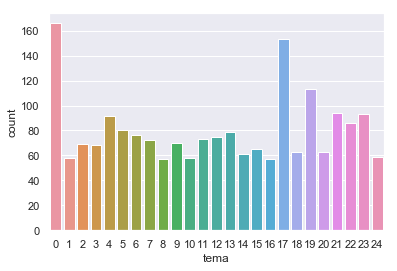

In [429]:
import seaborn as sns

sns.set()
sns.countplot(x='tema',data =pd_tweets)

In [430]:
import string
alphabet_string = string.ascii_lowercase
#Create a string of all lowercase letters

alphabet_list = list(alphabet_string)
#Create a list of all lowercase letters

print(alphabet_list)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [431]:
#Create lists of two words
two_word_list = []
for a in alphabet_list:
    for i in range(len(alphabet_list)):
        two_word_list.append(a+alphabet_list[i])
print(two_word_list)



['aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av', 'aw', 'ax', 'ay', 'az', 'ba', 'bb', 'bc', 'bd', 'be', 'bf', 'bg', 'bh', 'bi', 'bj', 'bk', 'bl', 'bm', 'bn', 'bo', 'bp', 'bq', 'br', 'bs', 'bt', 'bu', 'bv', 'bw', 'bx', 'by', 'bz', 'ca', 'cb', 'cc', 'cd', 'ce', 'cf', 'cg', 'ch', 'ci', 'cj', 'ck', 'cl', 'cm', 'cn', 'co', 'cp', 'cq', 'cr', 'cs', 'ct', 'cu', 'cv', 'cw', 'cx', 'cy', 'cz', 'da', 'db', 'dc', 'dd', 'de', 'df', 'dg', 'dh', 'di', 'dj', 'dk', 'dl', 'dm', 'dn', 'do', 'dp', 'dq', 'dr', 'ds', 'dt', 'du', 'dv', 'dw', 'dx', 'dy', 'dz', 'ea', 'eb', 'ec', 'ed', 'ee', 'ef', 'eg', 'eh', 'ei', 'ej', 'ek', 'el', 'em', 'en', 'eo', 'ep', 'eq', 'er', 'es', 'et', 'eu', 'ev', 'ew', 'ex', 'ey', 'ez', 'fa', 'fb', 'fc', 'fd', 'fe', 'ff', 'fg', 'fh', 'fi', 'fj', 'fk', 'fl', 'fm', 'fn', 'fo', 'fp', 'fq', 'fr', 'fs', 'ft', 'fu', 'fv', 'fw', 'fx', 'fy', 'fz', 'ga', 'gb', 'gc', 'gd', 'ge', 'gf', 'gg', 'gh', 'gi', 'gj', 'gk